In [1]:
import sys
sys.path.append("..")
from SINC_functions import *
import matplotlib.pyplot as plt

In [2]:
x = np.genfromtxt("x.csv")
m = np.genfromtxt("m.csv")
Omega_true = np.genfromtxt("prec_true.csv")
B_true = np.genfromtxt("B_true.csv")
adj_true = np.genfromtxt("adj_true.csv")

In [3]:
v0 = 0.01
v1 = 10
lamb = 150
vB = 1
a_pi = 2
b_pi = 2
a_gamma = 2
b_gamma = 2
a_tau = 2
b_tau = 2
max_iters = 100
tol_prec = 0.01
tol_elbo = 10.0
cpus = 1
omega, EZ, phi,B,iters_total, elbo, elbo_score  = SINC_update_tau(x, m, v0, v1, lamb, vB,a_gamma,b_gamma,a_pi,b_pi,a_tau,b_tau, max_iters, tol_prec, tol_elbo, cpus)

('ELBO:', -8266.38412621613, 'CHANGE IN ELBO:', 10000)
('ELBO:', -6625.495811361987, 'CHANGE IN ELBO:', 1640.8883148541427)
('ELBO:', -5363.196938020528, 'CHANGE IN ELBO:', 1262.2988733414586)
('ELBO:', -4795.154725923016, 'CHANGE IN ELBO:', 568.0422120975127)
('ELBO:', -4509.638406961769, 'CHANGE IN ELBO:', 285.5163189612467)
('ELBO:', -4373.223855349484, 'CHANGE IN ELBO:', 136.4145516122844)
('ELBO:', -4302.9334426658215, 'CHANGE IN ELBO:', 70.29041268366291)
('ELBO:', -4267.194278100188, 'CHANGE IN ELBO:', 35.73916456563347)
('ELBO:', -4253.115228893521, 'CHANGE IN ELBO:', 14.07904920666715)
('ELBO:', -4251.6433367655245, 'CHANGE IN ELBO:', 1.471892127996398)
('v0 = ', 0.01, 'Sparsity = ', 0.0432, 'ELBO = ', -4251.6433367655245)


# Check Model Performance

#### plot estimated B coefficients against true coefficients accounting for which covariates are selected

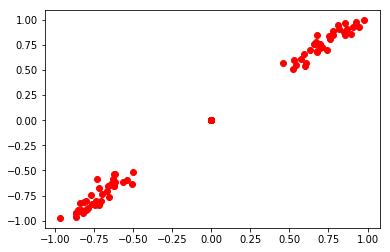

In [4]:
B_threshold = B.flatten() * (phi.flatten() > 0.50)
plt.plot(B_threshold,B_true.flatten(),'ro')
plt.show()

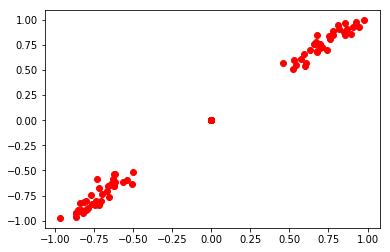

In [5]:
B_threshold = B.flatten() * (phi.flatten())
plt.plot(B_threshold,B_true.flatten(),'ro')
plt.show()

#### find the TPR, FPR, MCC, and F1 for B estimates

In [6]:
B_edges_true = (B_true != 0)*1
B_edges_est = (phi > 0.50) *1
TPR,FPR,MCC,F1 = np.round(Performance_B(B_edges_true,B_edges_est),4)
print("TPR:",TPR,"FPR:",FPR,"MCC:",MCC,"F1:",F1,)

('TPR:', 1.0, 'FPR:', 0.0, 'MCC:', 1.0, 'F1:', 1.0)


#### Plot estimated precision matrix values against true precision matrix values

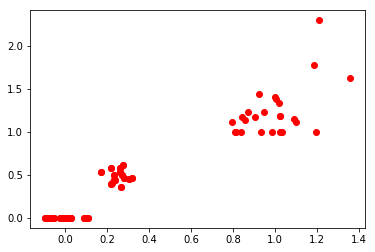

In [7]:
plt.plot(omega.flatten(),Omega_true.flatten(),'ro')
plt.show()

#### find the TPR, FPR, MCC, and F1 for Omega estimates

In [8]:
adj_est = (EZ > 0.50) * 1.0
TPR,FPR,MCC,F1 = np.round(Performance_Omega(adj_true,adj_est),4)
print("TPR:",TPR,"FPR:",FPR,"MCC:",MCC,"F1:",F1,)

('TPR:', 1.0, 'FPR:', 0.0403, 'MCC:', 0.7302, 'F1:', 0.7143)
